In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
car1 = mpimg.imread("car1.jpeg")

In [4]:
car1.shape

(168, 300, 3)

In [5]:
type(car1)

numpy.ndarray

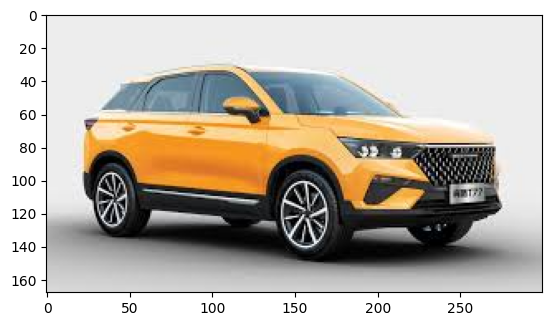

In [6]:
plt.imshow(car1)

In [7]:
car1_cv2 = cv2.imread("car1.jpeg")

In [8]:
cv2.imshow("image",car1_cv2)

In [9]:
car1_cv2.shape

(168, 300, 3)

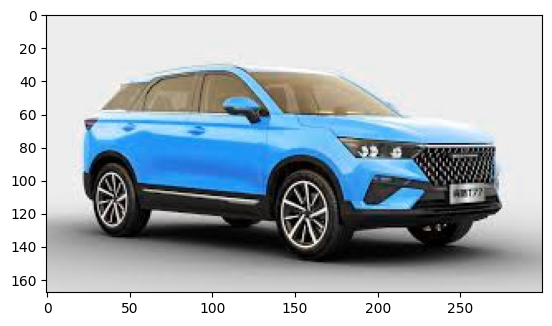

In [10]:
plt.imshow(car1_cv2) #cv2 read data as BGR and matplotlib read as RGB

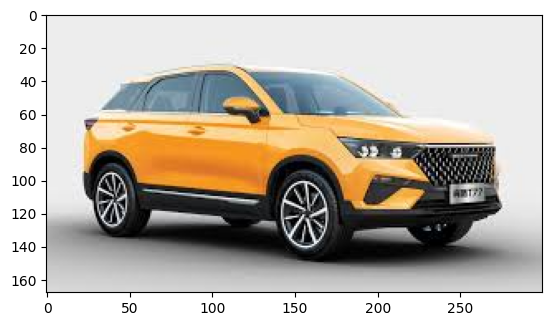

In [11]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

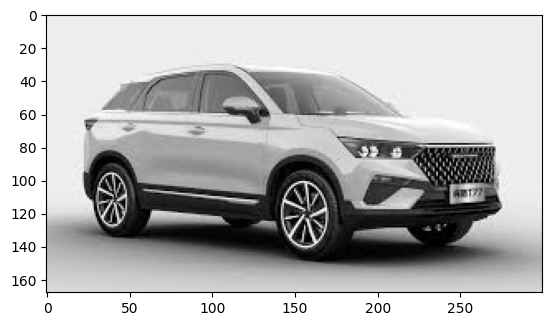

In [12]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY,cmap="gray")

In [13]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [14]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max() #min and max pixel intensity of entire pic

(0, 255)

In [15]:
cv2.imwrite("car_grayscale.jpeg",car1_cv2_BGR_GRAY)

True

In [16]:
car1_cv2_BGR_GRAY[0,0] #pixel intensity of 0,0 pixel position

237

#### Understanding composition of colored image

In [17]:
def visualize_RGB_channels(imgArray=None, figsize=(10,7)):
    #splittng the RGB components
    B,G,R = cv2.split(imgArray)

    #zero matrix
    z = np.zeros(B.shape,dtype=B.dtype)

    #init subplots
    fig, ax = plt.subplots(2,2, figsize=figsize)

    [axi.set_axis_off() for axi in ax.ravel()]
    ax[0,0].set_title("original_image")
    ax[0,0].imshow(cv2.merge((R,G,B)))

    ax[0,1].set_title("red_image")
    ax[0,1].imshow(cv2.merge((R,z,z)))

    ax[1,0].set_title("green_image")
    ax[1,0].imshow(cv2.merge((z,G,z)))

    ax[1,1].set_title("blue_image")
    ax[1,1].imshow(cv2.merge((z,z,B)))

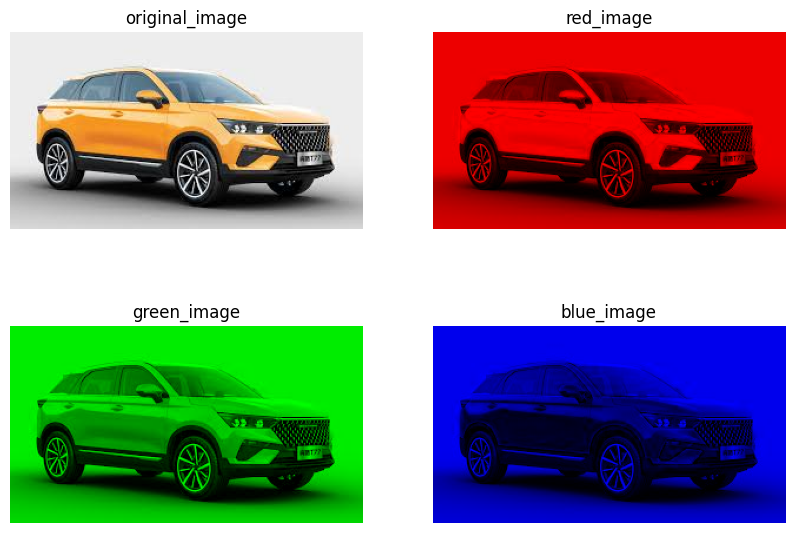

In [18]:
visualize_RGB_channels(imgArray=car1_cv2,)

In [19]:
random_colored_image = np.random.randint(0,255,(160,160,3))
random_colored_image.shape

(160, 160, 3)

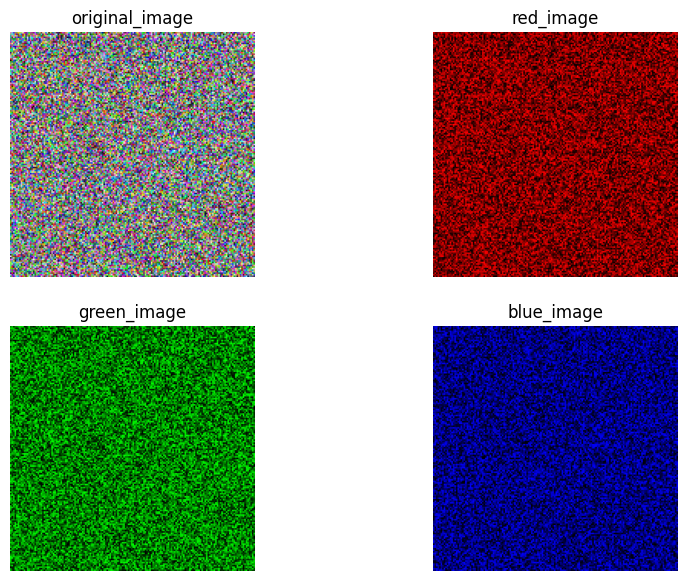

In [20]:
visualize_RGB_channels(imgArray=random_colored_image)

In [21]:
random_colored_image[0,0,:]

array([192, 129, 233])

#### Understanding filters

In [22]:
#Sobel filter
sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [23]:
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [24]:
#example array
example1 = [[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],]
example1 = np.array(example1)

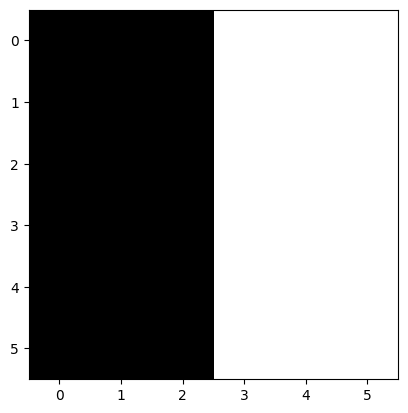

In [26]:
plt.imshow(example1, cmap='gray')

#### Applying sobel filter